# KMeans

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

sns.set(rc={'figure.figsize': [7, 7]}, font_scale=1.2)

In [2]:
# import data
df = pd.read_csv('Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


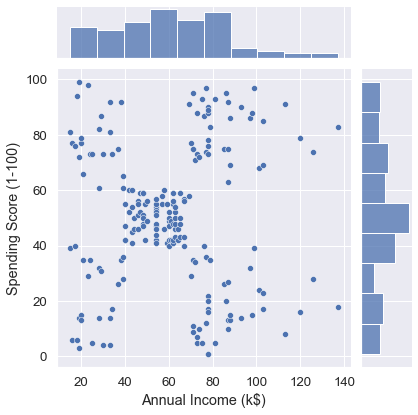

In [3]:
sns.jointplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df)

In [4]:
x = df[["Annual Income (k$)", "Spending Score (1-100)"]]
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_scaled = scaler.fit_transform(x)

In [6]:
x_scaled

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

In [7]:
model = KMeans(n_clusters=3)

clusters = model.fit_predict(x_scaled)
clusters

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0])

In [8]:
x['Clusters'] = clusters
x

C:\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Annual Income (k$),Spending Score (1-100),Clusters
0,15,39,2
1,15,81,2
2,16,6,2
3,16,77,2
4,17,40,2
...,...,...,...
195,120,79,0
196,126,28,1
197,126,74,0
198,137,18,1


In [9]:
centroids = model.cluster_centers_
centroids

array([[ 0.99158305,  1.23950275],
       [ 1.00919971, -1.22553537],
       [-0.62618966, -0.01439238]])

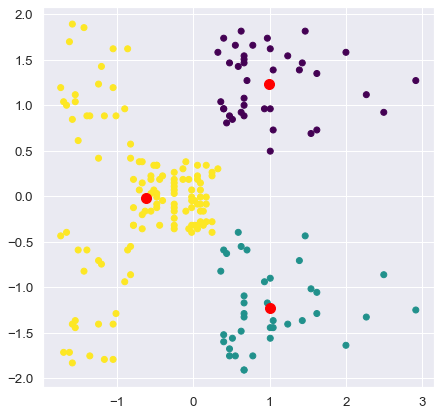

In [10]:
plt.scatter(x_scaled[:, 0], x_scaled[:,1], c=x['Clusters'], cmap='viridis')
plt.scatter(centroids[:,0], centroids[:,1], s=100, c='red')

In [11]:
model.predict(scaler.transform([[15, 80]]))

array([2])

In [12]:
model.inertia_

157.70400815035939

Text(0, 0.5, 'Score')

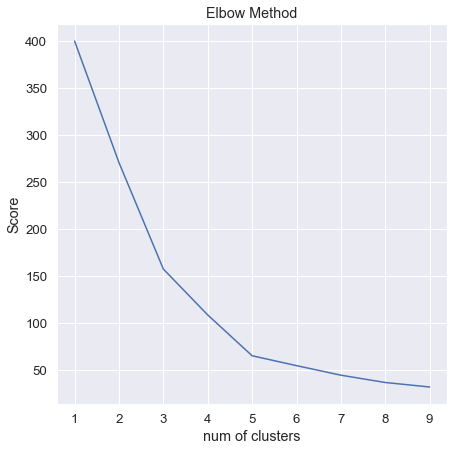

In [13]:
# choose the best number of clusters (K Value) using Elbow Method
scores = []
for i in range(1, 10):
    model = KMeans(n_clusters=i)
    model.fit(x_scaled)
    scores.append(model.inertia_)
plt.plot(range(1, 10), scores)
plt.title("Elbow Method")
plt.xlabel("num of clusters")
plt.ylabel("Score")

In [14]:
model = KMeans(n_clusters=5)

clusters = model.fit_predict(x_scaled)
clusters

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [15]:
x['Clusters'] = clusters
x

C:\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Annual Income (k$),Spending Score (1-100),Clusters
0,15,39,3
1,15,81,4
2,16,6,3
3,16,77,4
4,17,40,3
...,...,...,...
195,120,79,1
196,126,28,2
197,126,74,1
198,137,18,2


In [16]:
centroids = model.cluster_centers_
centroids

array([[-0.20091257, -0.02645617],
       [ 0.99158305,  1.23950275],
       [ 1.05500302, -1.28443907],
       [-1.30751869, -1.13696536],
       [-1.32954532,  1.13217788]])

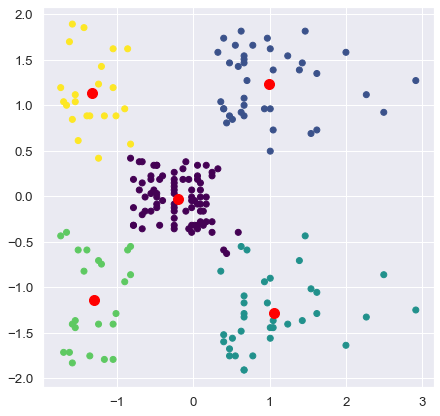

In [17]:
plt.scatter(x_scaled[:, 0], x_scaled[:,1], c=x['Clusters'], cmap='viridis')
plt.scatter(centroids[:,0], centroids[:,1], s=100, c='red')

In [18]:
model.predict(scaler.transform([[15, 80]]))

array([4])

## Full Example

In [19]:
df = pd.read_csv('Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [20]:
df.drop('CustomerID', axis=1, inplace=True)
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [21]:
df = pd.get_dummies(df, columns=['Gender'], drop_first=True)
df

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0
...,...,...,...,...
195,35,120,79,0
196,45,126,28,0
197,32,126,74,1
198,32,137,18,1


In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_scaled = scaler.fit_transform(df)

In [23]:
df_scaled

array([[-1.42456879, -1.73899919, -0.43480148,  1.12815215],
       [-1.28103541, -1.73899919,  1.19570407,  1.12815215],
       [-1.3528021 , -1.70082976, -1.71591298, -0.88640526],
       [-1.13750203, -1.70082976,  1.04041783, -0.88640526],
       [-0.56336851, -1.66266033, -0.39597992, -0.88640526],
       [-1.20926872, -1.66266033,  1.00159627, -0.88640526],
       [-0.27630176, -1.62449091, -1.71591298, -0.88640526],
       [-1.13750203, -1.62449091,  1.70038436, -0.88640526],
       [ 1.80493225, -1.58632148, -1.83237767,  1.12815215],
       [-0.6351352 , -1.58632148,  0.84631002, -0.88640526],
       [ 2.02023231, -1.58632148, -1.4053405 ,  1.12815215],
       [-0.27630176, -1.58632148,  1.89449216, -0.88640526],
       [ 1.37433211, -1.54815205, -1.36651894, -0.88640526],
       [-1.06573534, -1.54815205,  1.04041783, -0.88640526],
       [-0.13276838, -1.54815205, -1.44416206,  1.12815215],
       [-1.20926872, -1.54815205,  1.11806095,  1.12815215],
       [-0.27630176, -1.

In [24]:
model = KMeans(n_clusters=3)

clusters = model.fit_predict(df_scaled)
clusters

array([0, 0, 2, 0, 2, 0, 2, 0, 1, 0, 1, 0, 2, 0, 1, 0, 2, 0, 1, 0, 1, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 0,
       2, 0, 2, 2, 2, 2, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 1, 0, 2, 2, 1, 0,
       2, 2, 0, 2, 1, 2, 2, 2, 1, 0, 2, 1, 0, 2, 1, 1, 1, 2, 0, 1, 2, 0,
       2, 2, 2, 0, 1, 2, 2, 0, 2, 2, 1, 0, 2, 2, 1, 0, 1, 2, 2, 1, 1, 1,
       1, 0, 2, 0, 0, 0, 2, 2, 2, 2, 0, 2, 2, 0, 2, 0, 1, 0, 1, 0, 1, 0,
       2, 0, 1, 0, 2, 0, 1, 0, 2, 0, 2, 0, 1, 0, 1, 0, 2, 0, 1, 0, 2, 0,
       2, 0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 2, 0,
       1, 0, 1, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0,
       1, 0])

In [25]:
df['Clusters'] = clusters
df

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male,Clusters
0,19,15,39,1,0
1,21,15,81,1,0
2,20,16,6,0,2
3,23,16,77,0,0
4,31,17,40,0,2
...,...,...,...,...,...
195,35,120,79,0,0
196,45,126,28,0,2
197,32,126,74,1,0
198,32,137,18,1,1


In [26]:
df.groupby('Clusters').describe().transpose()

Clusters                               0           1           2
Age                    count   80.000000   49.000000   71.000000
                       mean    28.150000   49.204082   43.760563
                       std      6.312736   13.977630   12.059927
                       min     18.000000   19.000000   20.000000
                       25%     22.750000   40.000000   34.500000
                       50%     29.000000   48.000000   45.000000
                       75%     32.000000   59.000000   50.500000
                       max     40.000000   70.000000   68.000000
Annual Income (k$)     count   80.000000   49.000000   71.000000
                       mean    62.050000   62.244898   57.718310
                       std     29.297211   24.467266   23.858022
                       min     15.000000   19.000000   16.000000
                       25%     36.250000   46.000000   41.000000
                       50%     66.000000   62.000000   58.000000
                       75%     78.250000   78.000000   69.500000
                       max    137.000000  137.000000  126.000000
Spending Score (1-100) count   80.000000   49.000000   71.000000
                       mean    74.387500   29.734694   37.070423
                       std     15.136923   19.417320   15.556647
                       min     39.000000    1.000000    5.000000
                       25%     62.500000   12.000000   26.500000
                       50%     75.000000   35.000000   42.000000
                       75%     87.250000   47.000000   49.500000
                       max     99.000000   60.000000   60.000000
Gender_Male            count   80.000000   49.000000   71.000000
                       mean     0.487500    1.000000    0.000000
                       std      0.502997    0.000000    0.000000
                       min      0.000000    1.000000    0.000000
                       25%      0.000000    1.000000    0.000000
                       50%      0.000000    1.000000    0.000000
                       75%      1.000000    1.000000    0.000000
                       max      1.000000    1.000000    0.000000

In [27]:
df.columns

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Male',
       'Clusters'],
      dtype='object')

In [28]:
model.predict(scaler.transform([[15, 80, 30, 1]]))

array([0])

In [29]:
model.inertia_

476.86006878694354

Text(0, 0.5, 'Score')

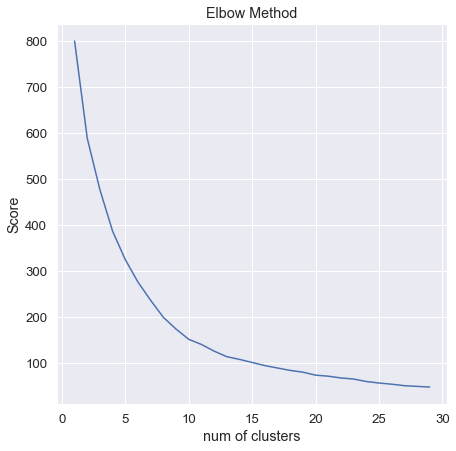

In [30]:
# choose the best number of clusters (K Value) using Elbow Method
scores = []
for i in range(1, 30):
    model = KMeans(n_clusters=i)
    model.fit(df_scaled)
    scores.append(model.inertia_)
plt.plot(range(1, 30), scores)
plt.title("Elbow Method")
plt.xlabel("num of clusters")
plt.ylabel("Score")

In [31]:
# from the scores, turns out the best clusters number is 5
model = KMeans(n_clusters=25)
clusters = model.fit_predict(df)
clusters

array([14,  3, 10,  3, 14,  3, 10, 23, 12,  3, 12, 23, 12,  3, 10,  3, 14,
        3,  0, 23, 14,  3, 12, 15, 12, 18,  0, 15,  0, 18, 12, 15, 12, 18,
       12, 18,  0, 15,  0, 15,  9, 18,  0, 15,  0, 15, 20, 22, 22, 22, 20,
        6, 22, 20, 20, 20, 20,  9, 22, 20,  9,  6,  9, 20,  9,  6, 20,  9,
        6, 22,  9, 20, 20, 20, 20,  6,  2,  2,  6,  2, 20,  2,  9,  2,  6,
        2,  2,  6,  6,  2, 16, 24,  2, 19, 19, 24,  2, 24,  2, 24, 24,  2,
       16, 24,  2, 24, 16,  2, 16, 16, 16, 24, 19, 24, 24, 24, 16,  2,  2,
        2, 24, 19,  2,  7, 19, 17, 19,  7,  5, 17,  5, 17, 19, 17, 13,  7,
        5, 17, 13, 17,  5,  7, 19,  7, 13,  7, 19, 17, 13,  7,  5,  7,  5,
       17,  5,  7, 13, 17, 13, 17,  5,  7, 13,  7,  5, 17,  5,  7,  8,  1,
        5,  1, 13,  7,  5,  7,  5,  1,  5, 21,  8, 21,  8, 21,  8, 21,  8,
        1,  8, 21,  8,  1,  4, 21,  4, 11,  4, 11,  4, 11])

In [32]:
import joblib

In [33]:
joblib.dump(model, 'kmeans_model.h5')
joblib.dump(scaler, 'kmeans_scaler.h5')

['kmeans_scaler.h5']